In [13]:
import archiveUtils, plotResults
from EncryptionAlgorithms.PartiallyHE import elGamal, paillier, RSA
from EncryptionAlgorithms.SomeWhatHE import CKKS, benaloh
from EncryptionAlgorithms.FullyHE import CKKS_Bootstrapping, BFV

In [14]:
def executeAlgorithms(resultASCII, result, printing: bool):
    """
    Execute various cryptographic algorithms on a given result. Depending on the performance of the algorithm different sizes of plaintext are given

    Parameters:
    - resultASCII: ASCII representation of the input result.
    - result: Original input result.
    - printing: A boolean indicating whether to print additional information.

    Returns:
    None

    Prints information about the execution of different cryptographic algorithms on the input result.
    """
    textSize, elapsedTimePaillierEnc, elapsedTimePaillierDec,elapsedTimeRSAEnc, elapsedTimeRSADec, elapsedTimeelGamalEnc, elapsedTimeelGamalDec, elapsedTimeCKKSBootrappingEnc, elapsedTimeCKKSBootrappingDec, elapsedTimeBFVEnc, elapsedTimeBFVDec, elapsedTimeCKKSEnc, elapsedTimeCKKSDec, elapsedTimeBenalogEnc, elapsedTimeBenalogDec = [],[],[],[],[],[],[],[],[],[],[],[],[],[], []
    if printing:
        print("------------ Original plaintext ----------")
        print(result)
        print(resultASCII)
        print(len(result))
    # Small Size
    for i in range(10, 101, 10):
        textSize.append(i)
        resultASCII_toUse = resultASCII[:i]
        print("************************************")
        print(f"********** text length {i} **********")
        print("************************************")
        try:
            # Execute Paillier partially homomorphic encryption
            resultPaillierEnc, resultPaillierDec = paillier.execute(resultASCII_toUse, printing)
            elapsedTimePaillierEnc.append(resultPaillierEnc)
            elapsedTimePaillierDec.append(resultPaillierDec)
        except Exception as e:
            print(f"Error in Paillier encryption: {e}")

        try:
            # Execute CKKS_Bootstrapping fully homomorphic encryption
            resultCKKSBootstrappingEnc, resultCKKSBootstrappingDec = CKKS_Bootstrapping.execute(resultASCII_toUse, printing)
            elapsedTimeCKKSBootrappingEnc.append(resultCKKSBootstrappingEnc)
            elapsedTimeCKKSBootrappingDec.append(resultCKKSBootstrappingDec)
        except Exception as e:
            print(f"Error in CKKS_Bootstrapping encryption: {e}")
    
    # reset array        
    textSize2 = []
   #long size 
    for i in range(1000, 10001, 1000):
        textSize2.append(i)
        resultASCII_toUse = resultASCII[:i]
        print("************************************")
        print(f"********** text length {i} **********")
        print("************************************")

        try:
            # Execute RSA partially homomorphic encryption
            resultRSAEnc, resultRSADec = RSA.execute(resultASCII_toUse, printing)
            elapsedTimeRSAEnc.append(resultRSAEnc)
            elapsedTimeRSADec.append(resultRSADec)
        except Exception as e:
            print(f"Error in RSA encryption: {e}")

        try:
            # Execute ElGamal partially homomorphic encryption
            resultelGamalEnc, resultelGamalDec = elGamal.execute(resultASCII_toUse, printing)
            elapsedTimeelGamalEnc.append(resultelGamalEnc)
            elapsedTimeelGamalDec.append(resultelGamalDec)
        except Exception as e:
            print(f"Error in ElGamal encryption: {e}")

        try:
            # Execute BFV fully homomorphic encryption
            resultBFVEnc, resultBFVDec = BFV.execute(resultASCII_toUse, printing)
            elapsedTimeBFVEnc.append(resultBFVEnc)
            elapsedTimeBFVDec.append(resultBFVDec)
        except Exception as e:
            print(f"Error in BFV encryption: {e}")
    
    # reset array        
    textSize3 = []
    #medium size 
    for i in range(2, 15, 2):
        textSize3.append(i)
        resultASCII_toUse = resultASCII[:i]
        print("************************************")
        print(f"********** text length {i} **********")
        print("************************************")
        
        try:
            # Execute CKKS somewhat homomorphic encryption
            resultCKKSEnc, resultCKKSdec = CKKS.execute(resultASCII_toUse, printing)
            elapsedTimeCKKSEnc.append(resultCKKSEnc)
            elapsedTimeCKKSDec.append(resultCKKSdec)
            
        except Exception as e:
            print(f"Error in CKKS encryption: {e}")

        try:
            # Execute Benaloh fully homomorphic encryption
            reusltBenalohEnc, resultBenalohDec = benaloh.execute(resultASCII_toUse, printing)
            elapsedTimeBenalogEnc.append(reusltBenalohEnc)
            elapsedTimeBenalogDec.append(resultBenalohDec)
        except Exception as e:
            print(f"Error in Benaloh encryption: {e}")

    '''plotResults.severalPlots(textSize, [elapsedTimeCKKSEnc,elapsedTimeBenalogEnc],["elapsedTimeCKKSEnc","elapsedTimeBenalogEnc"],"medium performance algorithms encryption")
    plotResults.severalPlots(textSize, [elapsedTimeCKKSDec,elapsedTimeBenalogDec],["elapsedTimeCKKSDec","elapsedTimeBenalogDec"],"medium performance algorithms decryption")

    # print data
    plotResults.plotData(elapsedTimePaillierEnc, textSize, "paillier encryption time spent")
    plotResults.plotData(elapsedTimePaillierDec, textSize, "paillier decryption time spent")
    plotResults.plotData(elapsedTimeCKKSBootrappingEnc, textSize, "CKKS-bootstrapping encryption time spent")
    plotResults.plotData(elapsedTimeCKKSBootrappingDec, textSize, "CKKS-bootstrapping decyption time spent")

    plotResults.plotData(elapsedTimeRSAEnc, textSize2, "RSA encryption time spent")
    plotResults.plotData(elapsedTimeRSADec, textSize2, "RSA decryption time spent")
    plotResults.plotData(elapsedTimeelGamalEnc, textSize2, "elGamal encryption time spent")
    plotResults.plotData(elapsedTimeelGamalDec, textSize2, "elGamal decyption time spent")
    plotResults.plotData(elapsedTimeBFVEnc, textSize2, "BFV encryption time spent")
    plotResults.plotData(elapsedTimeBFVDec, textSize2, "BFV decyption time spent")

    plotResults.plotData(elapsedTimeCKKSEnc, textSize3, "CKKS encryption time spent")
    plotResults.plotData(elapsedTimeCKKSDec, textSize3, "CKKS decyption time spent")
    plotResults.plotData(elapsedTimeBenalogEnc, textSize3, "Benaloh encryption time spent")
    plotResults.plotData(elapsedTimeBenalogDec, textSize3, "Benaloh decyption time spent")
    '''
    #print data together
    '''plotResults.severalPlots(textSize, [elapsedTimePaillierEnc,elapsedTimeCKKSBootrappingEnc],["elapsedTimePaillierEnc","elapsedTimeCKKSBootrappingEnc"],"low performance algorithms encryption")
    plotResults.severalPlots(textSize, [elapsedTimePaillierDec,elapsedTimeCKKSBootrappingDec],["elapsedTimePaillierDec","elapsedTimeCKKSBootrappingDec"],"low performance algorithms decryption")
    plotResults.severalPlots(textSize, [elapsedTimeRSAEnc,elapsedTimeelGamalEnc,elapsedTimeBFVEnc],["elapsedTimeRSAEnc","elapsedTimeelGamalEnc","elapsedTimeBFVEnc"],"high performance algorithms encryption")
    plotResults.severalPlots(textSize, [elapsedTimeRSADec,elapsedTimeelGamalDec,elapsedTimeBFVDec],["elapsedTimeRSADec","elapsedTimeelGamalDec","elapsedTimeBFVDec"],"high performance algorithms decryption")
    '''
   


In [15]:
def main(printing: bool):
    """
    Main function to execute cryptographic algorithms on the content of an archive.

    Parameters:
    - printing: A boolean indicating whether to print additional information.

    Returns:
    None

    Prints information about the execution of cryptographic algorithms on the content of an archive.
    """
    # Retrieve ASCII representation and original content from the archive
    resultASCII, result = archiveUtils.returnArchiveASCII("File/paragraphLarge")

    # Execute cryptographic algorithms on the archive content
    executeAlgorithms(resultASCII, result, printing)


------------ Original plaintext ----------
['L', 'o', 'r', 'e', 'm', ' ', 'i', 'p', 's', 'u', 'm', ' ', 'd', 'o', 'l', 'o', 'r', ' ', 's', 'i', 't', ' ', 'a', 'm', 'e', 't', ',', ' ', 'c', 'o', 'n', 's', 'e', 'c', 't', 'e', 't', 'u', 'r', ' ', 'a', 'd', 'i', 'p', 'i', 's', 'c', 'i', 'n', 'g', ' ', 'e', 'l', 'i', 't', ',', ' ', 's', 'e', 'd', ' ', 'd', 'o', ' ', 'e', 'i', 'u', 's', 'm', 'o', 'd', ' ', 't', 'e', 'm', 'p', 'o', 'r', ' ', 'i', 'n', 'c', 'i', 'd', 'i', 'd', 'u', 'n', 't', ' ', 'u', 't', ' ', 'l', 'a', 'b', 'o', 'r', 'e', ' ', 'e', 't', ' ', 'd', 'o', 'l', 'o', 'r', 'e', ' ', 'm', 'a', 'g', 'n', 'a', ' ', 'a', 'l', 'i', 'q', 'u', 'a', '.', ' ', 'I', 'n', 't', 'e', 'r', 'd', 'u', 'm', ' ', 'v', 'e', 'l', 'i', 't', ' ', 'e', 'u', 'i', 's', 'm', 'o', 'd', ' ', 'i', 'n', ' ', 'p', 'e', 'l', 'l', 'e', 'n', 't', 'e', 's', 'q', 'u', 'e', ' ', 'm', 'a', 's', 's', 'a', ' ', 'p', 'l', 'a', 'c', 'e', 'r', 'a', 't', ' ', 'd', 'u', 'i', 's', ' ', 'u', 'l', 't', 'r', 'i', 'c', 'i', 'e', '

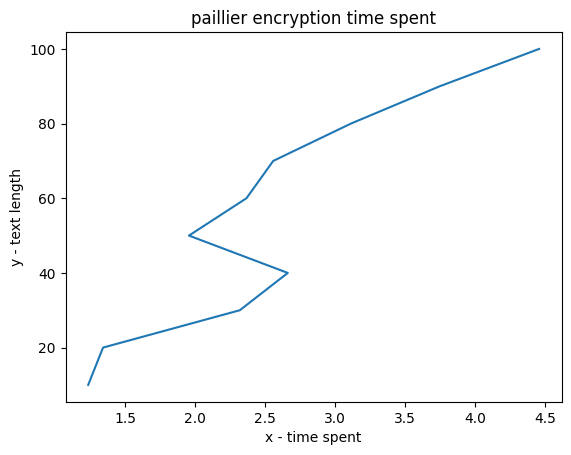

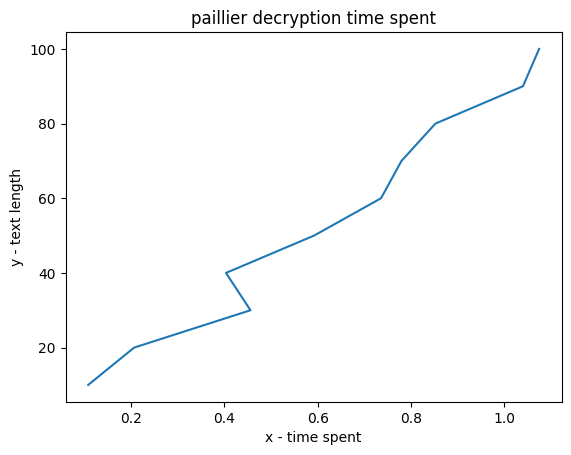

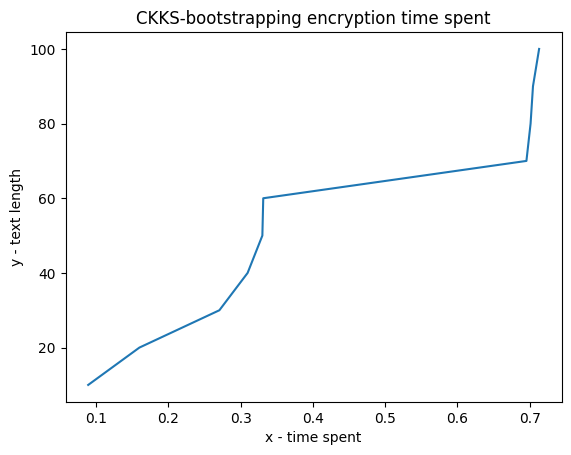

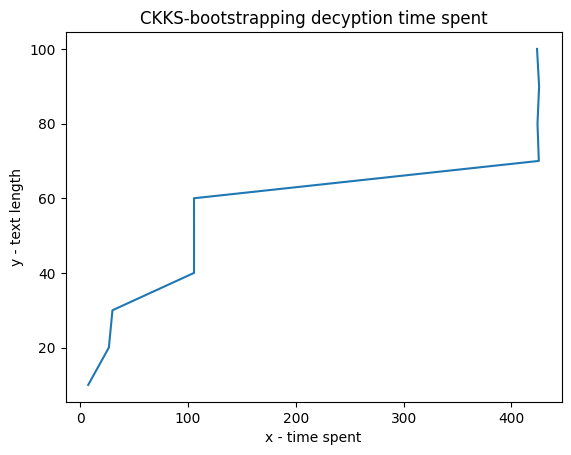

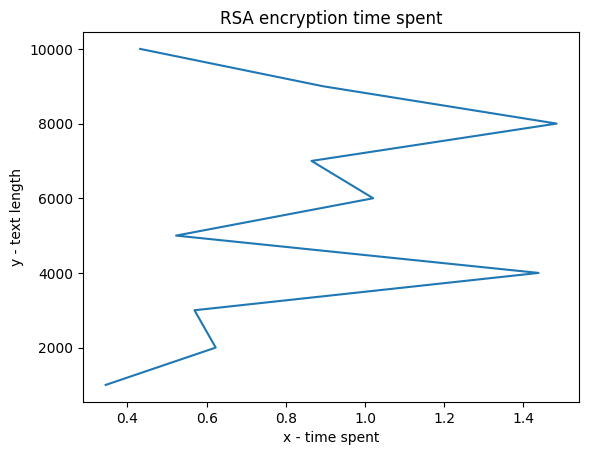

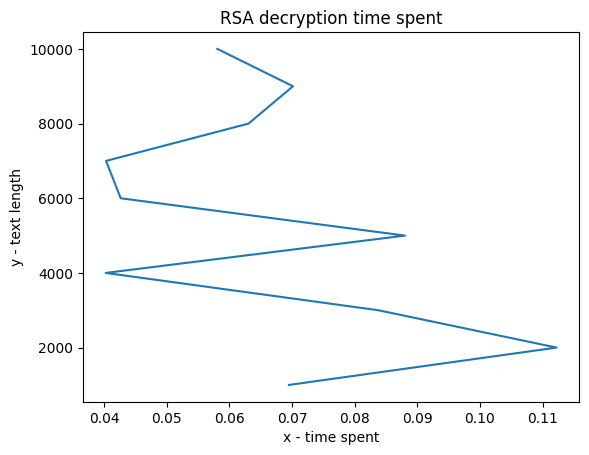

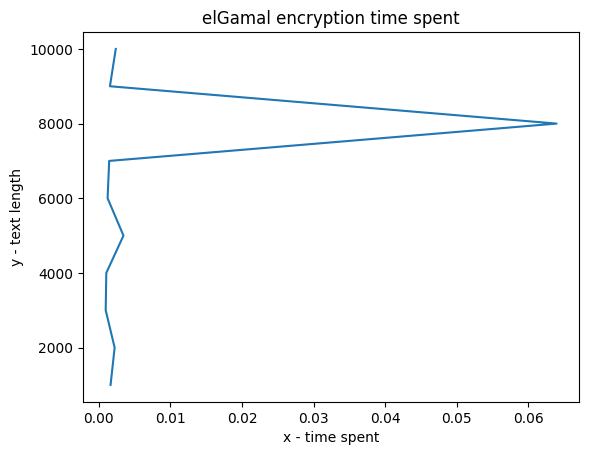

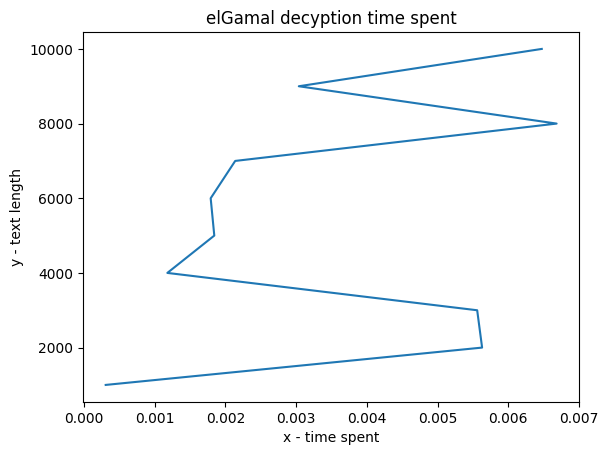

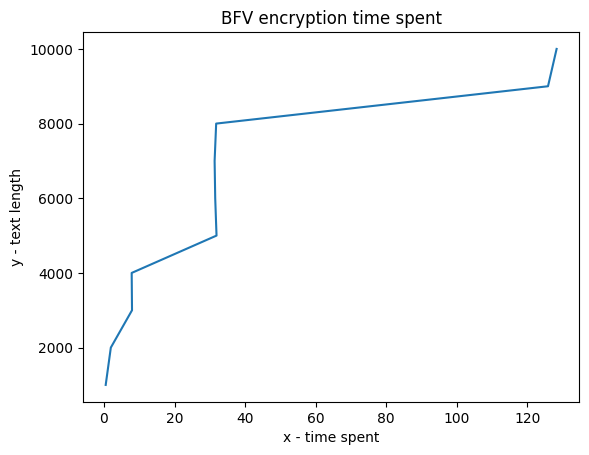

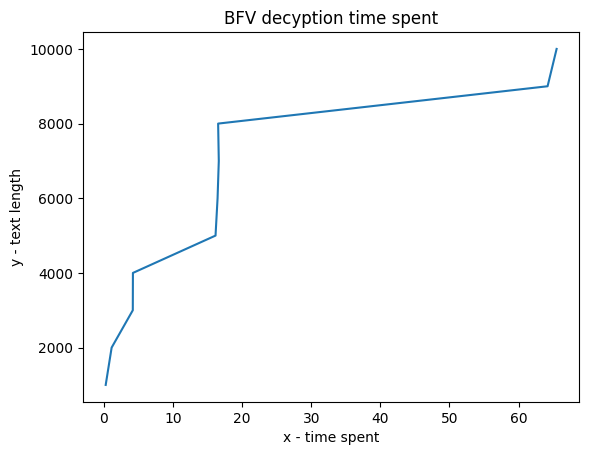

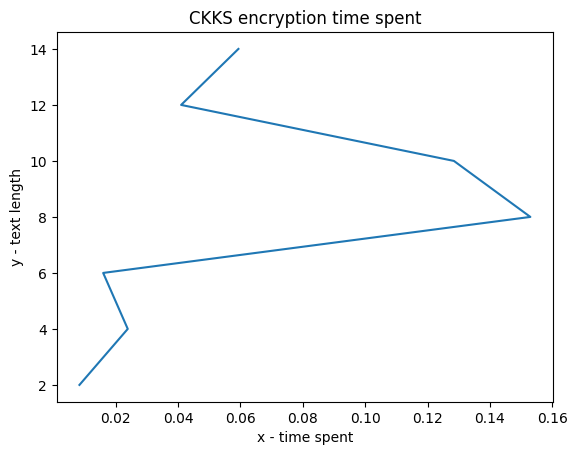

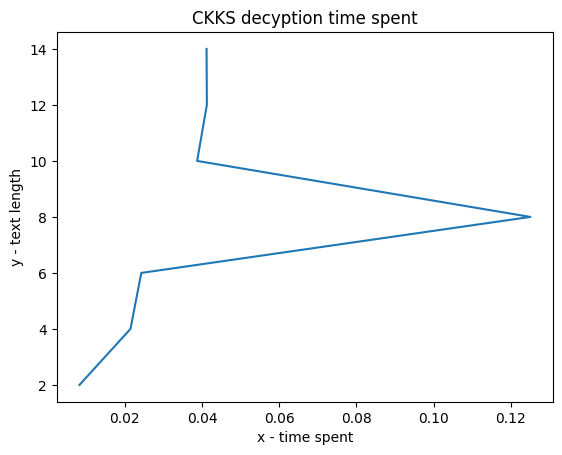

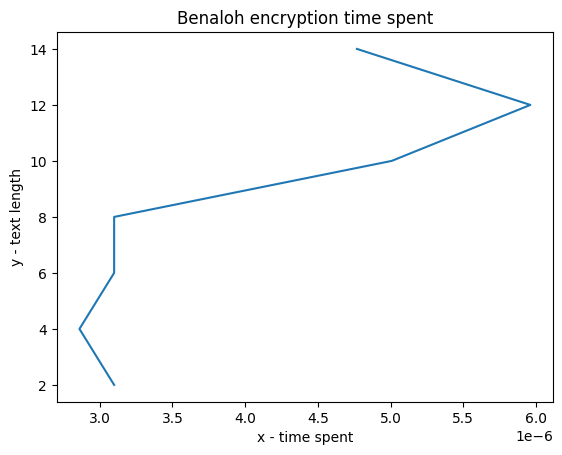

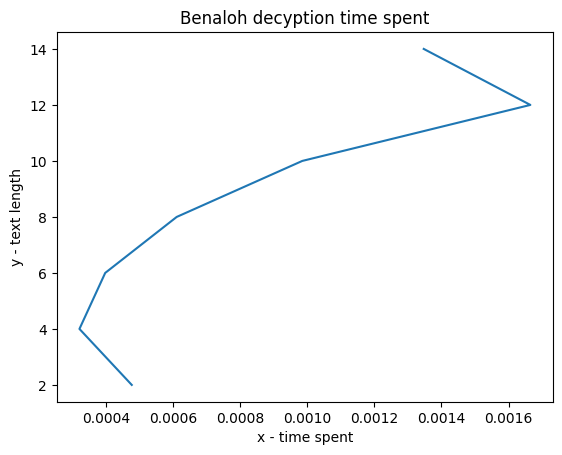

<Figure size 640x480 with 0 Axes>

In [16]:
if __name__ == "__main__":
    main(True)